In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [3]:
Base.classes.keys()

['measurement', 'station']

In [4]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_6 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)
for x in results_6:
    print(x)  
    

('2010-06-01', 78.0)
('2010-06-02', 76.0)
('2010-06-03', 78.0)
('2010-06-04', 76.0)
('2010-06-05', 77.0)
('2010-06-06', 78.0)
('2010-06-07', 77.0)
('2010-06-08', 78.0)
('2010-06-09', 78.0)
('2010-06-10', 79.0)
('2010-06-11', 78.0)
('2010-06-12', 78.0)
('2010-06-13', 78.0)
('2010-06-14', 77.0)
('2010-06-15', 78.0)
('2010-06-16', 78.0)
('2010-06-17', 77.0)
('2010-06-18', 77.0)
('2010-06-19', 82.0)
('2010-06-20', 78.0)
('2010-06-21', 78.0)
('2010-06-22', 78.0)
('2010-06-23', 78.0)
('2010-06-24', 78.0)
('2010-06-25', 77.0)
('2010-06-26', 76.0)
('2010-06-27', 78.0)
('2010-06-28', 78.0)
('2010-06-29', 78.0)
('2010-06-30', 78.0)
('2011-06-01', 77.0)
('2011-06-02', 78.0)
('2011-06-03', 73.0)
('2011-06-04', 70.0)
('2011-06-05', 76.0)
('2011-06-06', 77.0)
('2011-06-07', 77.0)
('2011-06-08', 77.0)
('2011-06-09', 77.0)
('2011-06-10', 78.0)
('2011-06-11', 77.0)
('2011-06-12', 77.0)
('2011-06-13', 78.0)
('2011-06-14', 78.0)
('2011-06-15', 77.0)
('2011-06-17', 78.0)
('2011-06-18', 78.0)
('2011-06-19'

('2012-06-18', 76.0)
('2012-06-19', 74.0)
('2012-06-20', 71.0)
('2012-06-21', 78.0)
('2012-06-22', 71.0)
('2012-06-23', 76.0)
('2012-06-24', 81.0)
('2012-06-25', 73.0)
('2012-06-26', 72.0)
('2012-06-27', 72.0)
('2012-06-28', 74.0)
('2012-06-29', 72.0)
('2012-06-30', 79.0)
('2013-06-01', 80.0)
('2013-06-02', 81.0)
('2013-06-03', 75.0)
('2013-06-04', 80.0)
('2013-06-05', 73.0)
('2013-06-06', 74.0)
('2013-06-07', 73.0)
('2013-06-08', 81.0)
('2013-06-09', 79.0)
('2013-06-10', 78.0)
('2013-06-11', 74.0)
('2013-06-12', 74.0)
('2013-06-13', 73.0)
('2013-06-14', 73.0)
('2013-06-15', 77.0)
('2013-06-16', 77.0)
('2013-06-17', 74.0)
('2013-06-18', 73.0)
('2013-06-19', 70.0)
('2013-06-20', 69.0)
('2013-06-21', 72.0)
('2013-06-22', 79.0)
('2013-06-23', 77.0)
('2013-06-24', 70.0)
('2013-06-25', 71.0)
('2013-06-26', 67.0)
('2013-06-27', 66.0)
('2013-06-28', 78.0)
('2013-06-29', 80.0)
('2013-06-30', 80.0)
('2014-06-01', 79.0)
('2014-06-02', 68.0)
('2014-06-03', 67.0)
('2014-06-04', 71.0)
('2014-06-06'

In [7]:
#  3. Convert the June temperatures to a list.
list(results_6)

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [9]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_6 = pd.DataFrame(results_6, columns=['date', 'temperatures'])
print(df_6)

            date  temperatures
0     2010-06-01          78.0
1     2010-06-02          76.0
2     2010-06-03          78.0
3     2010-06-04          76.0
4     2010-06-05          77.0
...          ...           ...
1695  2017-06-26          79.0
1696  2017-06-27          74.0
1697  2017-06-28          74.0
1698  2017-06-29          76.0
1699  2017-06-30          75.0

[1700 rows x 2 columns]


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_6.describe()

,temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

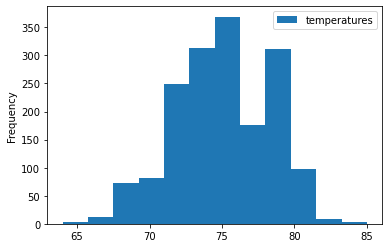

In [11]:
df_6.plot.hist(bins=12)


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_12 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(results_12)  

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [13]:
# 7. Convert the December temperatures to a list.
list(results_12)

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [15]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_12 = pd.DataFrame(results_12, columns=['date', 'temperatures'])
print(df_12)

            date  temperatures
0     2010-12-01          76.0
1     2010-12-03          74.0
2     2010-12-04          74.0
3     2010-12-06          64.0
4     2010-12-07          64.0
...          ...           ...
1512  2016-12-27          71.0
1513  2016-12-28          71.0
1514  2016-12-29          69.0
1515  2016-12-30          65.0
1516  2016-12-31          65.0

[1517 rows x 2 columns]


In [17]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_12.describe()

,temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

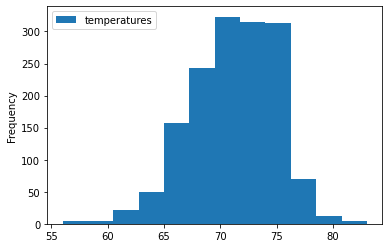

In [19]:
df_12.plot.hist(bins=12)


In [20]:
# amount of rain in June 
results_prcp_6 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
print(results_prcp_6)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [22]:
df_prcp_6 = pd.DataFrame(results_prcp_6, columns=['date', 'precipitation'])
df_prcp_6

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [23]:
df_prcp_6.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [24]:
# amount of rain in December 
results_prcp_12 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
print(results_prcp_12)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [25]:
df_prcp_12 = pd.DataFrame(results_prcp_12, columns=['date', 'precipitation'])
df_prcp_12

,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [26]:
df_prcp_12.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [27]:
res_6 = session.query(Measurement.station, func.count(Measurement.station)).filter(extract('month', Measurement.date)==6)\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
res_6


[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

In [28]:
res_12 = session.query(Measurement.station, func.count(Measurement.station)).filter(extract('month', Measurement.date)==12)\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
res_12


[('USC00519281', 217),
 ('USC00513117', 216),
 ('USC00519523', 210),
 ('USC00519397', 210),
 ('USC00516128', 206),
 ('USC00514830', 178),
 ('USC00511918', 152),
 ('USC00517948', 109),
 ('USC00518838', 19)]